In [1]:
import xarray as xr # top library for manipulating netcdf files
import netCDF4 # more basic library for manipulating netcdf files, used for exploring
import matplotlib.pyplot as plt # ploting library

# SO lets look at the virdis files
they still are Netcdf files, or files with an .nc
read abou tit here https://ncc.nesdis.noaa.gov/NOAA-20/NOAA20VIIRS.php

In [2]:
#get this file from slack or dowload one from oceancolor
#this should wotk for any VIIRS file 
#set the path to what you need
#I chose for this exaple a IOP data type.
#that stands for inharent opritcal proporties
#Inherent Optical Properties are the scattering and 
#absorption characteristics of particulate and dissolved materials in natural waters

path = 'A2021275201500.L2_LAC_IOP.x.nc'
ds = xr.open_dataset(path)
nc = netCDF4.Dataset(path)

FileNotFoundError: [Errno 2] No such file or directory: b'/mnt/beegfs/home/hbridgham2021/Desktop/Jupyter_notebooks/A2021275201500.L2_LAC_IOP.x.nc'

#We are using two different libraries to look at the same file.

##Xarray 
##NetCDF4 

In [46]:
#take some time to click around on the output bellow and loos at what the file contains.
ds

#when you open a VIRRS File 
#you get have 50 to 48 attribtes, just like last time 

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/50)
    title:                             MODISA Level-2 Data
    product_name:                      A2021286195500.L2_LAC_OC.nc
    processing_version:                2018.1
    equatorCrossingLongitude:          72.9771
    orbit_number:                      103432
    history:                           l2gen par=/data2/sdpsoper/vdc/vpu1/wor...
    ...                                ...
    geospatial_lon_max:                -87.346985
    geospatial_lon_min:                -99.76253
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     1.0048675537109375

In [47]:
#when we look at the nc 
# the title is something like title: MODISA Level-2 Data
#look for groups at the end of this file output
# the gouups we see are sensor_band_parameters, scan_line_attributes, geophysical_data, navigation_data, processing_control
#yay! that looks pretty close to what we had last time 

nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: MODISA Level-2 Data
    product_name: A2021286195500.L2_LAC_OC.nc
    processing_version: 2018.1
    equatorCrossingLongitude: 72.9771
    orbit_number: 103432
    history: l2gen par=/data2/sdpsoper/vdc/vpu1/workbuf/A2021286195500.L1B_LAC.param metafile=A2021286195500.L2_LAC_OC.nc.meta
    instrument: MODIS
    platform: Aqua
    Conventions: CF-1.6 ACDD-1.3
    license: https://science.nasa.gov/earth-science/earth-science-data/data-information-policy/
    naming_authority: gov.nasa.gsfc.sci.oceandata
    id: 2018.1/L2/A2021286195500.L2_LAC_OC.nc
    date_created: 2022-01-21T23:57:39.000Z
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    keywords: Earth Science > Oceans > Ocean Optics > Ocean Color
    standard_name_vocabulary: CF Standard Name Table v36
    institution: NASA Goddard Space Flight Center, Ocean Ecology Laboratory, Ocean Biology Processi

In [48]:
# list the groups
[g for g in nc.groups]

['sensor_band_parameters',
 'scan_line_attributes',
 'geophysical_data',
 'navigation_data',
 'processing_control']

In [49]:
#in loop form:
for g in nc.groups:
    print(g)

sensor_band_parameters
scan_line_attributes
geophysical_data
navigation_data
processing_control


In [50]:
# now load the data in xarray just like last time 
# since we have 'geophysical_data' and 'navigation_data' its just the same as last time 
data = xr.open_dataset(path, group='geophysical_data')
navigation = xr.open_dataset(path, group='navigation_data')
# navigation has lat lon information
# data has geophysical data
# just like las time 

In [51]:
# navigation has lat lon information
data


<xarray.Dataset>
Dimensions:   (number_of_lines: 501, pixels_per_line: 738)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables:
    pic       (number_of_lines, pixels_per_line) float32 ...
    poc       (number_of_lines, pixels_per_line) float32 ...
    ipar      (number_of_lines, pixels_per_line) float32 ...
    nflh      (number_of_lines, pixels_per_line) float32 ...
    l2_flags  (number_of_lines, pixels_per_line) int32 ...

In [52]:
# data has geophysical data
navigation

<xarray.Dataset>
Dimensions:       (number_of_lines: 501, pixel_control_points: 738)
Dimensions without coordinates: number_of_lines, pixel_control_points
Data variables:
    longitude     (number_of_lines, pixel_control_points) float32 ...
    latitude      (number_of_lines, pixel_control_points) float32 ...
    cntl_pt_cols  (pixel_control_points) float64 ...
    cntl_pt_rows  (number_of_lines) float64 ...
    tilt          (number_of_lines) float32 ...
Attributes:
    gringpointlongitude:  [-87.349525 -98.73056  -99.76253  -88.06464 ]
    gringpointlatitude:   [17.456978 16.067272 20.523602 21.874739]
    gringpointsequence:   [1 2 3 4]

In [39]:
# Lets explore the other groups to see what they have
bands = xr.open_dataset(path, group = "sensor_band_parameters")
bands

# it has 9 data vars 
# it has NO2 Absorption, what! thats cool 


<xarray.Dataset>
Dimensions:      (number_of_bands: 24, number_of_reflective_bands: 16)
Dimensions without coordinates: number_of_bands, number_of_reflective_bands
Data variables:
    wavelength   (number_of_bands) float64 ...
    vcal_gain    (number_of_reflective_bands) float32 ...
    vcal_offset  (number_of_reflective_bands) float32 ...
    F0           (number_of_reflective_bands) float32 ...
    aw           (number_of_reflective_bands) float32 ...
    bbw          (number_of_reflective_bands) float32 ...
    k_oz         (number_of_reflective_bands) float32 ...
    k_no2        (number_of_reflective_bands) float32 ...
    Tau_r        (number_of_reflective_bands) float32 ...

In [40]:
# this one too
scan = xr.open_dataset(path, group = "scan_line_attributes")
scan

# it has 12 data vars 
# and they are not that exciting 

<xarray.Dataset>
Dimensions:  (number_of_lines: 453)
Dimensions without coordinates: number_of_lines
Data variables:
    year     (number_of_lines) float64 ...
    day      (number_of_lines) timedelta64[ns] ...
    msec     (number_of_lines) timedelta64[ns] ...
    detnum   (number_of_lines) float32 ...
    mside    (number_of_lines) float32 ...
    slon     (number_of_lines) float32 ...
    clon     (number_of_lines) float32 ...
    elon     (number_of_lines) float32 ...
    slat     (number_of_lines) float32 ...
    clat     (number_of_lines) float32 ...
    elat     (number_of_lines) float32 ...
    csol_z   (number_of_lines) float32 ...

In [53]:
# this one too
proc = xr.open_dataset(path, group = "processing_control")
proc

# it has 5 data Attributes   
# and they are also not that exciting 

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    software_name:     l2gen
    software_version:  9.5.1-V2021.1
    source:            A2021286195500.L1B_LAC,A2021286195500.GEO,N202128618_M...
    calibration_data:  A2021286195500.L1A_LAC, MYD02_Reflective_LUTs.V6.2.1.6...
    mask_names:        ATMFAIL,LAND,CLDICE,HILT

We created the funtion bellow after exploration, so the steps we did can be repeated easily with any other files

In [54]:
#same as last time 

def load_satdata(path):
    # Reads a MODIS data file
    # input: file name
    # output: a dataset with all the adjustments we did to inlude lat and lon
    data = xr.open_dataset(path, group='geophysical_data')
    navigation = xr.open_dataset(path, group='navigation_data')
    # rename the names of navigation dims so they are the same as the data dims
    # you can see the names of the dims in you individual dataset exploration.
    # both files have the same shape (they correspond to the same points)
    # but the names are different. so we have to fix that to be able to combine both
    navigation = navigation.rename({'pixel_control_points': 'pixels_per_line'})
    # we have to filter data that doesnt have lat or lon values (nan), 
    # because there can't be a data point without a location
    # ~ means no, ~().isnull(), means give me the values that are NOT nans
    mask = (~navigation['latitude'].isnull()) & (~navigation['longitude'].isnull())
    # filter to get only data with lat/lon values
    data = data.where(mask, drop=True)
    # add 'lat', 'lon' variables to data, from the navigation dataset
    data['lat'] = navigation['latitude'].where(mask, drop=True)
    data['lon'] = navigation['longitude'].where(mask, drop=True)
    # return the dataset
    return data

In [55]:
# ds is the Dataset
# and I want to work with a_412_giop
# this one is the otal absorption at 412 nm, GIOP model, importnat for CDOM 

ds = load_satdata(path)
ds

<xarray.Dataset>
Dimensions:   (number_of_lines: 501, pixels_per_line: 738)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables:
    pic       (number_of_lines, pixels_per_line) float32 0.000138 ... nan
    poc       (number_of_lines, pixels_per_line) float32 44.6 47.0 ... nan nan
    ipar      (number_of_lines, pixels_per_line) float32 0.001548 ... nan
    nflh      (number_of_lines, pixels_per_line) float32 0.04187 ... nan
    l2_flags  (number_of_lines, pixels_per_line) float64 288.0 ... 1.074e+09
    lat       (number_of_lines, pixels_per_line) float32 17.46 17.45 ... 20.52
    lon       (number_of_lines, pixels_per_line) float32 -87.35 ... -99.76

## some basic ploting
pcolormesh recives a data variable that has 2 dimensions (e.g xy) and plots a value (color) in an x-y space.

plt.pcolormesh(var) will work if var has two dimensions, but will not know what x or y are.

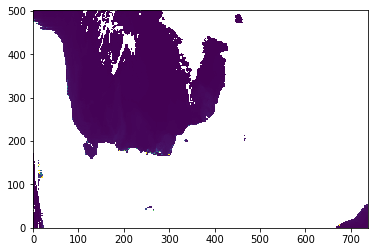

In [57]:
plt.pcolormesh(ds['a_412_giop'])
# but there is no location information on it (the map is fliped)
# and look at that MAP! 

you can specify locations for x and y. x, y and var have to have the same shape
plt.pcolormesh(x, y, var)

/mnt/beegfs/home/hbridgham2021/.conda/envs/bugs/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


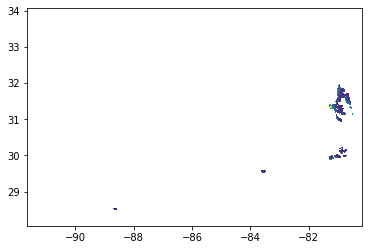

In [44]:
plt.pcolormesh(ds['lon'], ds['lat'], ds['a_412_giop'])
# and with the lat long fix here is what it looks like 